<a href="https://colab.research.google.com/github/SaiJaswanthM/Lear-Project/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
file1='/content/drive/My Drive/Colab Notebooks/hsl1 - Report.csv'
df1=pd.read_csv(file1, nrows=30)
file2='/content/drive/My Drive/Colab Notebooks/HSL2 - Report.csv'
df2=pd.read_csv(file2, nrows=30)
print(len(df1))
len(df2)

30


30

In [0]:
#taking first 30 rows upper limit is included
num=pd.Series(np.arange(df2.shape[0]))
df2['num']=num
df2=df2[df2['num']<30]

In [0]:
df2.head(2)

,Unnamed: 0,Date,Time,Prgram Model,Variant,Custumer No,Model No,Pallet No Front,Pallet No Rear 1,Pallet No Rear 2,Pallet ID,Position,Mode,Line ID,SerialNo,Result,NG No,OP10 Load Guide Plate|OCR,OP10 Load Guide Plate|Time|Cycle,OP10 Load Guide Plate|Time|Index,OP20 Cam Spring L|Time|Cycle,OP20 Cam Spring L|Time|Index,OP30 Cam Spring R|Time|Cycle,OP30 Cam Spring R|Time|Index,OP40 Cam Ass'y|OCR,OP40 Cam Ass'y|Time|Cycle,OP40 Cam Ass'y|Time|Index,OP50 Poka Yoka-1|Spring Check,OP50 Poka Yoka-1|Spring Torque Inspection|SPEC,OP50 Poka Yoka-1|Spring Torque Inspection|Data,OP50 Poka Yoka-1|Spring Torque Inspection|Result,OP50 Poka Yoka-1|Time|Cycle,OP50 Poka Yoka-1|Time|Index,OP60 Primary Pawl L|1 OCR,OP60 Primary Pawl L|2 OCR,OP60 Primary Pawl L||Time|Cycle,OP60 Primary Pawl L||Time|Index,OP70 Primary Pawl R|1 OCR,OP70 Primary Pawl R|2 OCR,OP70 Primary Pawl R|Time|Cycle,...,OP331 Rotation Chuck R|Angle|DATA,OP331 Rotation Chuck R|Angle|Result,OP331 Rotation Chuck R|Torque|SPEC,OP331 Rotation Chuck R|Torque|DATA,OP331 Rotation Chuck R|Torque|Result,OP331 Rotation Chuck R|Time|Cycle,OP331 Rotation Chuck R|Time|Index,OP332 Rotation Chuck L|Angle|SPEC,OP332 Rotation Chuck L|Angle|DATA,OP332 Rotation Chuck L|Angle|Result,OP332 Rotation Chuck L|Torque|SPEC,OP332 Rotation Chuck L|Torque|DATA,OP332 Rotation Chuck L|Torque|Result,OP332 Rotation Chuck L|Time|Cycle,OP332 Rotation Chuck L|Time|Index,OP340 Position Check,OP340 Position Check|Time|Cycle,OP340 Position Check|Time|Index,OP350 Marking|Time|Cycle,OP350 Marking|Time|Index,OP360 Time|Cycle,OP360 Time|Index,OP370 SCAN Result,OP370 USER Result,OP370 Unloading|Time|Cycle,OP370 Unloading|Time|Index,LPS,Batch Code|OP10 Guide Plate,Batch Code|OP20 Cam Spring L,Batch Code|OP30 Cam Spring R,Batch Code|OP30 Cam L,Batch Code|OP50 Cam R,Batch Code|OP60 Primary Pawl L,Batch Code|OP70 Primary Pawl R,Batch Code|OP80 Auxiliary Pawl L,Batch Code|OP100 Auxiliary Pawl R,Batch Code|OP140 Gear Plate,Batch Code|OP140 Gear Matel Ring,,num
0,1,15-10-2019,08:43:32,GM Brasil GEM,1RS MAN LH IB,L0491235,2,20,10,10,"""19101408280711""",RH,NORMAL,B,28890404A435,OK,NaN,1622 1,3.0,5.3,5.2,3.3,NaN,NaN,8 0,6.2,28.8,OK,1.3 ~ 2.5 N.m,1.95,OK,5.4,3.2,NaN,NaN,NaN,NaN,2RF3919 R,2AF3918 R,4.3,...,0.014,OK,5.0 ~ 16.0,12.4,OK,13.2,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OK,8.3,18.0,0.0,0.0,NaN,NaN,OK,NaN,18.4,0.0,214,T0057|L0492900AA|002|1F4012|100|FSF1196|FB 286...,NaN,NaN,T0057|L0577169AA|002|LF203|70|FSF52|FB 440L|41...,T0057|L0577168AA|002|LF404|500|FSF907|FB 441L|...,T0057|L0528511AA|002|LF3913|1000|FSF1159|FB 29...,NaN,T0057|L0528507AA|002|LF4005|1000|FSF1183|FB 29...,NaN,T0057|L0577170AA|002|1F3914|75|FSF1126|FB 442L...,NaN,NaN,0
1,2,15-10-2019,08:42:55,GM Brasil GEM,1RS MAN RH IB,L0491234,2,0,34,34,"""19101408281510""",LH,NORMAL,A,28890400A334,OK,NaN,1,3.1,5.7,NaN,NaN,4.2,10.8,1LF385R 0,6.3,2.5,OK,1.3 ~ 2.5 N.m,1.67,OK,5.4,2.9,4LF3909 L L,4LF3307 L L,4.4,331.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 ~ 0.189,0.0,OK,5.0 ~ 16.0,12.2,OK,12.1,4.6,OK,7.4,8.5,16.0,2.1,NaN,NaN,OK,NaN,9.5,0.0,439,T0057|L0492900AA|002|1F4012|100|FSF1196|FB 286...,NaN,NaN,T0057|L0577169AA|002|LF203|70|FSF52|FB 440L|41...,T0057|L0577168AA|002|LF404|500|FSF907|FB 441L|...,T0057|L0528511AA|002|LF3913|1000|FSF1159|FB 29...,NaN,T0057|L0528507AA|002|LF4005|1000|FSF1183|FB 29...,NaN,T0057|L0577170AA|002|1F3914|75|FSF1126|FB 442L...,NaN,NaN,1


In [0]:
df2.describe()

,Unnamed: 0,Model No,Pallet No Front,Pallet No Rear 1,Pallet No Rear 2,NG No,OP10 Load Guide Plate|Time|Cycle,OP10 Load Guide Plate|Time|Index,OP20 Cam Spring L|Time|Cycle,OP20 Cam Spring L|Time|Index,OP30 Cam Spring R|Time|Cycle,OP30 Cam Spring R|Time|Index,OP40 Cam Ass'y|Time|Cycle,OP40 Cam Ass'y|Time|Index,OP50 Poka Yoka-1|Spring Torque Inspection|Data,OP50 Poka Yoka-1|Time|Cycle,OP50 Poka Yoka-1|Time|Index,OP60 Primary Pawl L||Time|Cycle,OP60 Primary Pawl L||Time|Index,OP70 Primary Pawl R|Time|Cycle,OP70 Primary Pawl R|Time|Index,OP80 Auxiliary Pawl L||Time|Cycle,OP80 Auxiliary Pawl L||Time|Index,OP90 Idle Time|Cycle,OP90 Idle Time|Index,OP100 Auxiliary Pawl R|Time|Cycle,OP100 Auxiliary Pawl R|Time|Index,OP110 Poka Yoka-2|Time|Cycle,OP110 Poka Yoka-2||Time|Index,OP120 Cam Disk Loading|Time|Cycle,OP120 Cam Disk Loading|Time|Index,OP130 Poka Yoke-3|Time|Cycle,OP130 Poka Yoke-3|Time|Index,OP140 Gear Plate|Time|Cycle,OP140 Gear Plate|Time|Index,OP150 Glide Load/Ring Press|Power|Strat,OP150 Glide Load/Ring Press|Power|End,OP150 Glide Load/Ring Press|Power|Dev,OP150 Glide Load/Ring Press|Travel|Strat,OP150 Glide Load/Ring Press|Travel|End,...,OP310 Laterel Play|DATA|A,OP310 Laterel Play|DATA|B,OP310 Laterel Play|DATA|c,OP310 Laterel Play|DATA|Avg,OP310 Laterel Play|Time|Cycle,OP310 Laterel Play|Time|Index,OP320 EOL TEST|Effort|Release|DATA,OP320 EOL TEST|Effort|Release|Cam Travel,OP320 EOL TEST|Lock Test|DATA #1,OP320 EOL TEST|Lock Test|DATA #2,OP320 EOL TEST|Lock Angle Variation|Data Max,OP320 EOL TEST|Rotational Effort|Data Max,OP320 EOL TEST|First Lock|Data,OP320 EOL TEST|Time|Cycle,OP320 EOL TEST|Time|Index,OP331 Rotation Chuck R|Angle|DATA,OP331 Rotation Chuck R|Torque|DATA,OP331 Rotation Chuck R|Time|Cycle,OP331 Rotation Chuck R|Time|Index,OP332 Rotation Chuck L|Angle|DATA,OP332 Rotation Chuck L|Torque|DATA,OP332 Rotation Chuck L|Time|Cycle,OP332 Rotation Chuck L|Time|Index,OP340 Position Check|Time|Cycle,OP340 Position Check|Time|Index,OP350 Marking|Time|Cycle,OP350 Marking|Time|Index,OP360 Time|Cycle,OP360 Time|Index,OP370 USER Result,OP370 Unloading|Time|Cycle,OP370 Unloading|Time|Index,LPS,Batch Code|OP20 Cam Spring L,Batch Code|OP30 Cam Spring R,Batch Code|OP70 Primary Pawl R,Batch Code|OP100 Auxiliary Pawl R,Batch Code|OP140 Gear Matel Ring,,num
count,30.000000,30.0,30.000000,30.000000,30.000000,0.0,30.000000,30.000000,15.000000,15.000000,15.000000,15.000000,30.000000,30.000000,30.00000,30.000000,30.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,0.0,0.0,15.000000,15.000000,30.000000,30.000000,15.000000,15.00000,30.000000,30.000000,30.000000,30.000000,30.00000,30.0,30.00000,30.000000,30.0,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,30.000000,30.000000,30.000000,30.000000,0.0,0.0,0.0,30.000000,30.0,30.000000,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
mean,15.500000,2.0,10.633333,25.833333,25.833333,NaN,3.250000,29.830000,4.840000,28.046667,4.120000,29.073333,6.243333,26.106667,1.71000,5.573333,25.873333,4.560000,26.860000,4.673333,4.880000,6.260000,2.926667,NaN,NaN,4.220000,6.866667,4.616667,6.483333,5.620000,5.50000,4.550000,6.346667,5.580000,5.046667,1.68070,0.0,1.68070,114.722500,0.0,...,0.147000,0.156000,0.108333,0.137667,8.946667,19.970000,1.620667,28.982333,0.580333,-0.288667,0.869000,1.244000,360.071333,12.843333,14.666667,0.006933,12.693333,11.800000,15.060000,0.003067,12.806667,12.220000,14.526667,7.993333,19.123333,7.516667,6.743333,NaN,NaN,NaN,13.246667,0.0,3476.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.500000
std,8.803408,0.0,9.334708,12.345831,12.345831,NaN,0.212943,82.581183,0.292282,84.073640,0.094112,83.893372,0.171572,82.606195,0.12157,0.272831,82.703387,0.180476,84.201559,0.793245,2.709033,3.192133,0.921541,NaN,NaN,0.290812,7.893005,0.297209,7.777868,0.169874,7.69239,0.871681,8.126573,0.242686,7.720092,0.34011,0

In [0]:
df2.shape

(30, 228)

In [0]:
df1.columns

Index(['Unnamed: 0', 'Date', ' Time', ' Prgram Model', ' Variant',
       ' Custumer No', ' Model No', ' Pallet No Front', ' Pallet No Rear 1',
       ' Pallet No Rear 2',
       ...
       ' Batch Code|OP50 CAM L', ' Batch Code|OP50 CAM R',
       ' Batch Code|OP70 Primary Pawl L', ' Batch Code|OP80 Primary Pawl R',
       ' Batch Code|OP90 Auxiliary Pawl L',
       ' Batch Code|OP100 Auxiliary Pawl R', ' Batch Code|OP140 Gear Plate L',
       ' Batch Code|OP150 Gear Plate R',
       ' Batch Code|OP160 Glide Load/Ring Press', ' '],
      dtype='object', length=217)

In [0]:
parameter = df1[' OP280 Laterel Play|DATA|Avg'] 
avg = parameter.mean()
df1['avg'] = avg
avg

0.05241379310344828

In [0]:
std = parameter.std()

In [0]:
target = 0.125
tolerance = 0.125
upper_tol=target+tolerance
lower_tol=target-tolerance

In [0]:
number=pd.Series(np.arange(df1.shape[0]))
# number

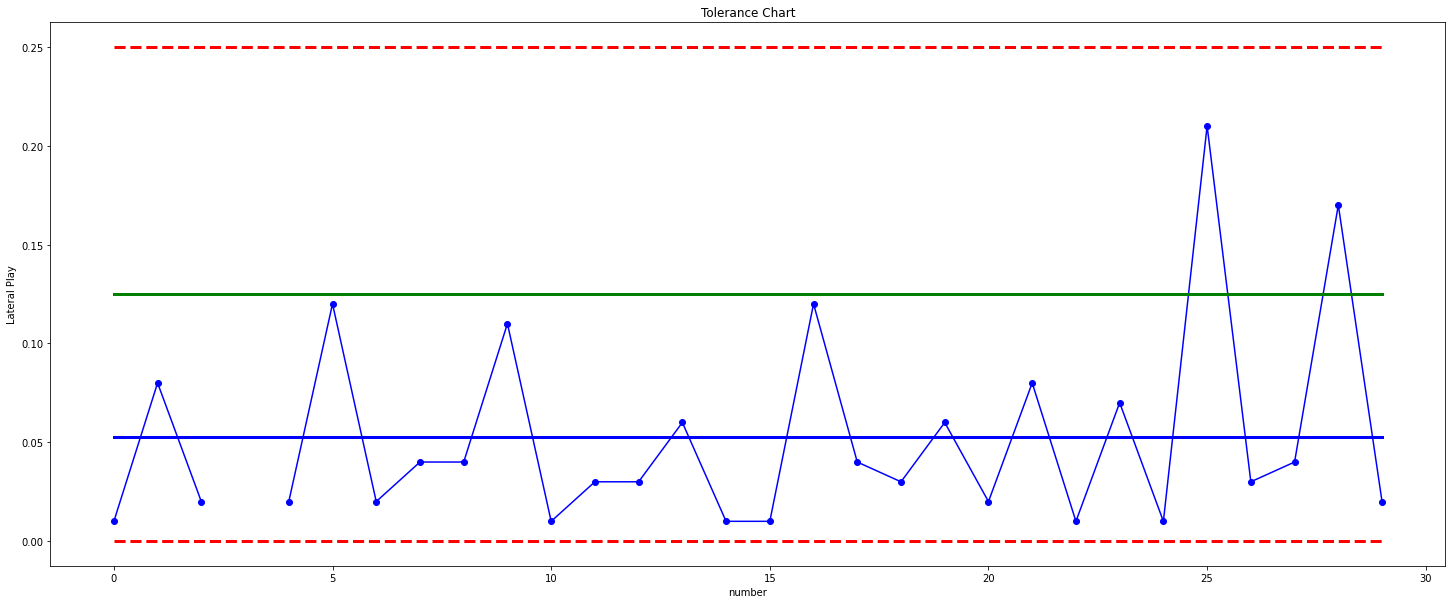

In [0]:
df1['target']=target
df1['upper_tol']=upper_tol
df1['lower_tol']=lower_tol
df1['number']=number

fig=plt.figure(figsize=(25,10))
plt.plot(number, df1['avg'], linestyle='solid', linewidth=3, color='b')
plt.plot(number, parameter, color='b', marker='o')
plt.plot(number, df1['target'], color='g', linewidth=3)
plt.plot(number, df1['upper_tol'], color='r', linewidth=3, linestyle='dashed')
plt.plot(number, df1['lower_tol'], color='r', linewidth=3, linestyle='dashed')
plt.xlabel('number')
plt.ylabel('Lateral Play')
plt.title('Tolerance Chart')
plt.show()


In [0]:
upper_1 = avg + std*1
upper_2 = avg + std*2
upper_3 = avg + std*3

lower_1 = avg - std*1
lower_2 = avg - std*2
lower_3 = avg - std*3

df1['upper_1'] = upper_1
df1['upper_2'] = upper_2
df1['upper_3'] = upper_3

df1['lower_1'] = lower_1
df1['lower_2'] = lower_2
df1['lower_3'] = lower_3

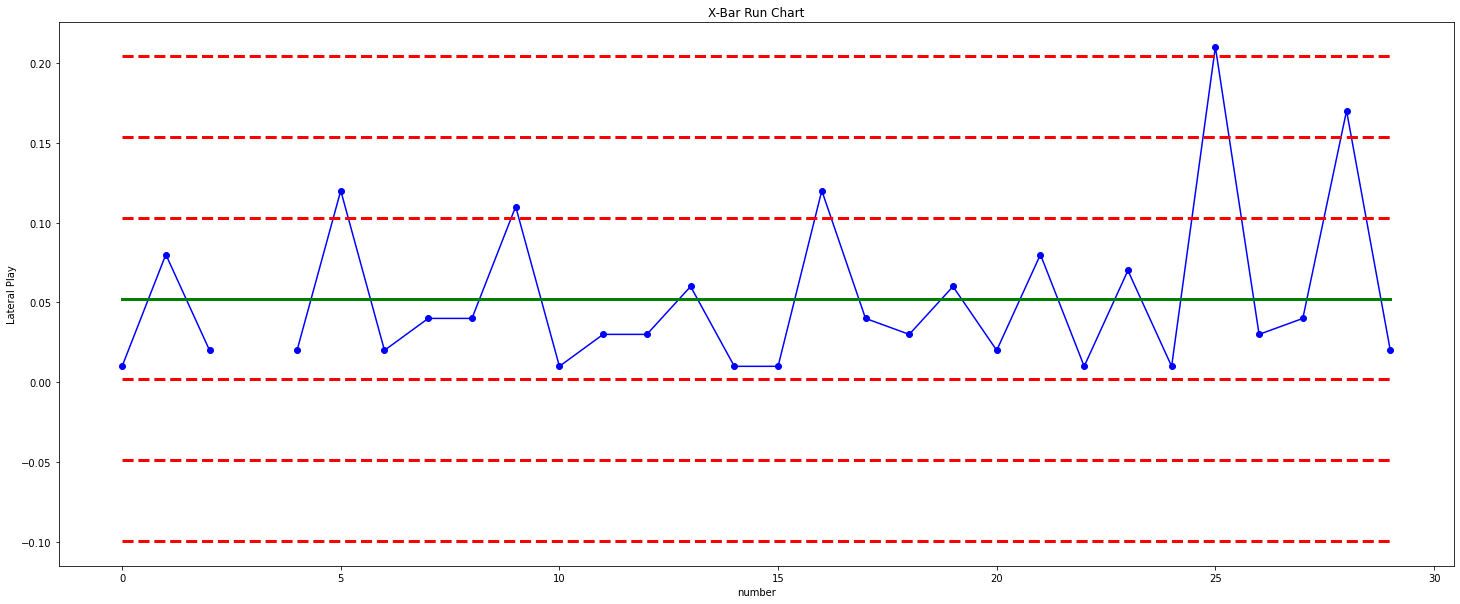

0.2043
0.1536
0.103
0.0524
0.0018
-0.0488
-0.0994


In [0]:
fig=plt.figure(figsize=(25,10))
               
plt.plot(number,lat_play, color='b', marker='o')
plt.plot(number, df1['avg'], linestyle='solid', linewidth=3, color='g')
plt.plot(number, df1['upper_1'], linestyle='dashed', linewidth=3, color='r')
plt.plot(number, df1['upper_2'], linestyle='dashed', linewidth=3, color='r')
plt.plot(number, df1['upper_3'], linestyle='dashed', linewidth=3, color='r')

plt.plot(number, df1['lower_1'], linestyle='dashed', linewidth=3, color='r')
plt.plot(number, df1['lower_2'], linestyle='dashed', linewidth=3, color='r')
plt.plot(number, df1['lower_3'], linestyle='dashed', linewidth=3, color='r')
plt.xlabel('number')
plt.ylabel('Lateral Play')
plt.title('X-Bar Run Chart')
plt.show()
print(round(upper_3,4))
print(round(upper_2,4))
print(round(upper_1,4))
print(round(avg,4))
print(round(lower_1,4))
print(round(lower_2,4))
print(round(lower_3,4))

In [0]:
errors=set()
errors.clear

<function set.clear>

In [0]:
differentials_to_target = parameter - target
differentials_to_avg = parameter - avg
first_differences = np.ediff1d(parameter)

In [0]:
#tolerances
if np.max(np.absolute(differentials_to_target)) > tolerance:
    errors.add("Dimensions are out of tolerance")
#beyond limit
absolute_differentials = np.absolute(differentials_to_avg)

if np.max(absolute_differentials) > upper_3:
    errors.add("Outliers Exist")
errors        

set()

In [0]:
#outer region or Zone A
for index, i in enumerate(absolute_differentials):
    if index < 2:
        continue
    count = np.count_nonzero(absolute_differentials[index-2:index+1] > (std*2))
    if count >= 2:
            errors.add("Outer Zone Clusters")

errors

set()

In [0]:
#middle regions or Zone B
for index, i in enumerate(absolute_differentials):
    if index < 4:
        continue
    count = np.count_nonzero(absolute_differentials[index-4:index+1] > (std*1))
    if count >= 4:
            errors.add("Middle Zone Clusters")
errors

set()

In [0]:
#inner region or Zone C
for index, i in enumerate(absolute_differentials):
    if index < 6:
        continue
    count = np.count_nonzero(differentials_to_avg[index-6:index+1] > 0)
    if count >= 7:
            errors.add("Inner Zone Clusters")
    count = np.count_nonzero(differentials_to_avg[index-6:index+1] < 0)
    if count >= 7:
            errors.add("Inner Zone Clusters")

errors

set()

In [0]:
#trends
for index, i in enumerate(first_differences):
    if index < 6:
        continue
    count = np.count_nonzero(first_differences[index-5:index+1] > 0)
    if count >= 7:
        errors.add("Trending Data is Present")
    count = np.count_nonzero(first_differences[index-5:index+1] < 0)
    if count >= 7:
        errors.add("Trending Data is Present")
    
errors

In [0]:
#mixture
for index, i in enumerate(absolute_differentials):
    if index < 8:
        continue
    count = np.count_nonzero(absolute_differentials[index-8:index+1] > upper_3)
    if count == 0:
      errors.add("No Mixture")
    else:
      errors.add("Mixture")

errors

{'No Mixture'}

In [0]:
#stratification
for index, i in enumerate(absolute_differentials):
    if index < 15:
        continue
    count = np.count_nonzero(absolute_differentials[index-15:index+1] > upper_1)
    if count == 0:
      errors.add("No Stratification")
errors

{'No Mixture', 'No Stratification'}

In [0]:
#over control
def sign_change(x,y):
    if x > 0 and y > 0:
        return 0
    elif x < 0 and y < 0:
        return 0
    else:
        return 1 

changes = []

for index, i in enumerate(first_differences):
    if index == 0:
        continue
    change = sign_change(first_differences[index],first_differences[index-1])
    changes.append(change)

for index, i in enumerate(changes):
    if index < 14:
        continue
    if np.array(changes[index-14:index+1]).sum() >= 15:
        errors.add("Over Control")
errors

{'No Mixture', 'No Stratification', 'Over Control'}

In [0]:
# Possible causes
causes = set() 
for ele in errors:
  if ele == "Outliers Exist" or ele == "Outer Zone Clusters":
    causes.add("New person doing the job, Wrong setup, Measurement error, Process step skipped, Process step not completed, Power failure, Equipment breakdown")
  elif ele == "Middle Zone Clusters" or ele == "Inner Zone Clusters":
    causes.add("Raw material change, Change in work instruction, Different measurement device/calibration, Different shift, Person gains greater skills in doing the job, Change in maintenance program, Change in setup procedure")  
  elif ele == "Trending data is present":
    causes.add("Tooling wear or Temperature effects (cooling, heating)") 
  elif ele == "Mixture" or ele == "Stratification":
    causes.add("More than one process present (e.g. shifts, machines, raw material.)") 
  elif ele == "Over Control":
    causes.add("Tampering by operator or Alternating raw materials")   

causes

{'Tampering by operator or Alternating raw materials'}

In [0]:
options = list(df1.columns)

In [0]:
# importing plotly package
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [0]:
import cufflinks as cf

In [0]:
init_notebook_mode(connected=True)

In [0]:
cf.go_offline()

In [0]:
# configuring plotly display
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import plotly.graph_objects as go

fig = go.Figure()
configure_plotly_browser_state()

fig.add_trace(go.Scatter(x=df1['number'],y=df1['avg'],name="mean value"))
fig.add_trace(go.Scatter(x=df1['number'],y=parameter,name="original values"))
fig.add_trace(go.Scatter(x=df1['number'],y=df1['target'],name="target"))
fig.add_trace(go.Scatter(x=df1['number'],y=df1['upper_tol'],name="upper tol"))
fig.add_trace(go.Scatter(x=df1['number'],y=df1['lower_tol'],name="lower tol"))

fig.update_layout(title="Tolerance Chart",xaxis_title="number",yaxis_title='Lateral Play',
                  font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [0]:
configure_plotly_browser_state()
df1.iplot(x='number',y=['avg',' OP280 Laterel Play|DATA|Avg','target','upper_tol','lower_tol'])